In [1]:
import pandas as pd
bigmart_sales_data = pd.read_csv("Train.csv")

In [2]:
df = bigmart_sales_data.copy()

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat', 'low fat':'Low Fat','reg':'Regular'})

In [5]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
df['Years_Established'] = df['Outlet_Establishment_Year'].apply(lambda x: 2022 - x)
df.drop(["Outlet_Establishment_Year"], axis=1, inplace=True)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split( df.drop(['Item_Outlet_Sales', 'Item_Identifier'], axis=1), df['Item_Outlet_Sales'], test_size=0.33, random_state=42)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5710, 10), (2813, 10), (5710,), (2813,))

In [10]:
X_train['Item_Weight'].fillna(X_train['Item_Weight'].mean(), inplace = True)
X_test['Item_Weight'].fillna(X_test['Item_Weight'].mean(), inplace = True)

In [11]:
X_train['Outlet_Size'].fillna(X_train['Outlet_Size'].mode()[0], inplace = True)
X_test['Outlet_Size'].fillna(X_test['Outlet_Size'].mode()[0], inplace = True)

In [12]:
def handling_categorical_values(df_transformed):
    Mean_encoded_Item_Type = df.groupby(["Item_Type"])['Item_Outlet_Sales'].mean().to_dict()
    df_transformed["Item_Type"] = df_transformed['Item_Type'].map(Mean_encoded_Item_Type)
    
    Mean_encoded_Outlet_Identifier = df.groupby(["Outlet_Identifier"])['Item_Outlet_Sales'].mean().to_dict()
    df_transformed["Outlet_Identifier"] = df_transformed['Outlet_Identifier'].map(Mean_encoded_Outlet_Identifier)
    
    df_transformed = pd.get_dummies(data=df_transformed, columns=["Item_Fat_Content", "Outlet_Size", "Outlet_Location_Type", "Outlet_Type"], drop_first=True)
    return df_transformed

In [13]:
X_train = handling_categorical_values(X_train)
X_test = handling_categorical_values(X_test)

In [14]:
X_train.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Years_Established,Item_Fat_Content_Regular,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
3288,12.945668,0.031187,1926.139702,39.5480,3694.038558,37,0,1,0,0,1,0,0,1
2206,12.650000,0.076199,2132.867744,191.3846,2192.384798,20,1,1,0,1,0,1,0,0
170,14.500000,0.019472,1926.139702,164.8210,2438.841866,18,0,0,1,1,0,1,0,0
6526,12.945668,0.057762,2289.009592,237.3564,3694.038558,37,1,1,0,0,1,0,0,1
135,7.235000,0.076856,2258.784300,116.0492,2277.844267,25,0,0,1,0,0,1,0,0


In [15]:
X_test.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Years_Established,Item_Fat_Content_Regular,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
7503,14.300000,0.026300,2132.867744,79.4302,2298.995256,35,0,0,0,0,1,1,0,0
2957,7.930000,0.071136,2010.000265,42.7086,2277.844267,25,0,0,1,0,0,1,0,0
7031,14.500000,0.041313,2225.194904,42.0454,2348.354635,23,1,1,0,0,0,1,0,0
1084,12.679069,0.044767,2006.511735,173.7054,3694.038558,37,1,1,0,0,1,0,0,1
856,10.195000,0.012456,2158.977911,197.5110,2438.841866,18,1,0,1,1,0,1,0,0


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [17]:
def outliers_calculator(col):  
    Q1 = np.percentile(col, 25, interpolation = 'midpoint')
    Q3 = np.percentile(col, 75, interpolation = 'midpoint')
    IQR = Q3 - Q1
    upper, lower = [], []
    for i in col:
        if i >= (Q3+1.5*IQR):
            upper.append(i)
        if i <= (Q1-1.5*IQR):
            lower.append(i)
    print("Total Element: ", len(col))
    print("Upper bound:",Q3+1.5*IQR)
    print("Lower bound:", Q1-1.5*IQR)
    print("Total Outliers: ", len(upper) + len(lower))
    print(f"Outlier Percent : {(len(upper) + len(lower)) * 100 /len(col)}% ")

    return upper + lower

In [18]:
itemvisout = outliers_calculator(X_train["Item_Visibility"])

Total Element:  5710
Upper bound: 0.1948159985
Lower bound: -0.07376994550000002
Total Outliers:  92
Outlier Percent : 1.6112084063047285% 


In [19]:
outletindout = outliers_calculator(X_train["Outlet_Identifier"])

Total Element:  5710
Upper bound: 2582.3093901113475
Lower bound: 1958.4300421441708
Total Outliers:  1351
Outlier Percent : 23.660245183887916% 


In [20]:
X_train.drop('Outlet_Identifier', axis=1, inplace=True)
X_test.drop('Outlet_Identifier', axis=1, inplace=True)

In [21]:
X_train.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Years_Established,Item_Fat_Content_Regular,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
3288,12.945668,0.031187,1926.139702,39.5480,37,0,1,0,0,1,0,0,1
2206,12.650000,0.076199,2132.867744,191.3846,20,1,1,0,1,0,1,0,0
170,14.500000,0.019472,1926.139702,164.8210,18,0,0,1,1,0,1,0,0
6526,12.945668,0.057762,2289.009592,237.3564,37,1,1,0,0,1,0,0,1
135,7.235000,0.076856,2258.784300,116.0492,25,0,0,1,0,0,1,0,0


In [22]:
import statsmodels.api as sm
import numpy as np
def ols_results(X, y):
    X1 = sm.add_constant(X)
    OLS_model = sm.OLS(y,X1).fit()
    return OLS_model.summary()

In [23]:
ols_results(X_train, y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     557.1
Date:                Mon, 01 Aug 2022   Prob (F-statistic):               0.00
Time:                        12:29:45   Log-Likelihood:                -48304.
No. Observations:                5710   AIC:                         9.664e+04
Df Residuals:                    5696   BIC:                         9.673e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           109.6430    815.648      0.134      0.893   -1489.337    1708.623
Item_Weight                      -2.6085      3.591     -0.726      0.468      -9.648       4.431
Item_Visibility                -603.6083    310.288     -1.945      0.052   -1211.891       4.675
Item_Type                         0.0822      0.130      0.630      0.529      -0.174       0.338
Item_MRP                         15.8571      0.243     65.334      0.000      15.381      16.333
Years_Established               -35.7408     12.673     -2.820      0.005     -60.585     -10.897
Item_Fat_Content_Regular         67.4995     31.963      2.112      0.035       4.840     130.159
Outlet_Size_Medium             -844.2713    314.730     -2.683      0.007   -1461.262    -227.281
Outlet_Size_Small              -805.2936    306.953     -2.624      0.009   -1407.039    -203.548
Outlet_Location_Type_Tier 2    -225.6835     89.028     -2.535      0.011    -400.212     -51.155
Outlet_Location_Type_Tier 3    -412.2664    178.221     -2.313      0.021    -761.647     -62.886
Outlet_Type_Supermarket Type1  1531.3551    174.182      8.792      0.000    1189.892    1872.819
Outlet_Type_Supermarket Type2  1259.5606    158.814      7.931      0.000     948.225    1570.896
Outlet_Type_Supermarket Type3  3782.4288    181.356     20.856      0.000    3426.902    4137.956
==============================================================================
Omnibus:                      608.541   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1431.711
Skew:                           0.637   Prob(JB):                    1.28e-311
Kurtosis:                       5.097   Cond. No.                     1.40e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
from sklearn.ensemble import RandomForestRegressor
randomforestregressor = RandomForestRegressor()

In [25]:
RandomForestRegressor_reg = RandomForestRegressor(n_estimators=1500,max_depth=6)
from sklearn.model_selection import cross_val_score
randomforestregressor_all_accuracies = cross_val_score(estimator=RandomForestRegressor_reg, X=X_train, y=y_train, cv=5)
randomforestregressor_all_accuracies

array([0.60264394, 0.59017847, 0.56766991, 0.62013744, 0.56653324])

In [26]:
print(randomforestregressor_all_accuracies.mean())

0.589432600385569


In [27]:
RandomForestRegressor_reg_model = RandomForestRegressor_reg.fit(X_train, y_train)

In [28]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

r2_randomforestregressor = r2_score(y_test, RandomForestRegressor_reg_model.predict(X_test))
mse_randomforestregressor = mean_squared_error(y_test, RandomForestRegressor_reg_model.predict(X_test), squared=True)
rmse_randomforestregressor = np.sqrt(mse_randomforestregressor)

print(r2_randomforestregressor)
print(mse_randomforestregressor)
print(rmse_randomforestregressor)

0.6008188690515116
1118795.4237076745
1057.731262517883


C:\Users\dkc\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


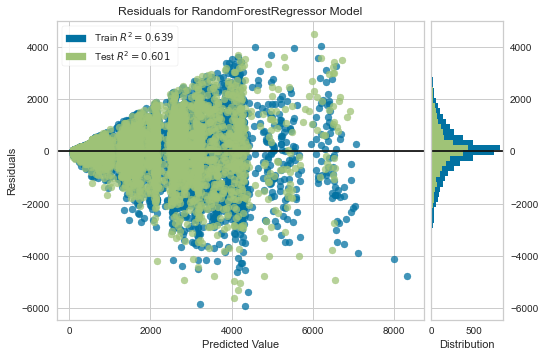

<AxesSubplot:title={'center':'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [29]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(RandomForestRegressor_reg_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [30]:
import pickle
pickle.dump(RandomForestRegressor_reg_model, open("model_reg.pkl","wb"))

In [31]:
pickle_model_reg = pickle.load(open("model_reg.pkl", "rb"))
pickle_model_reg.predict(X_test)

array([1226.86289061,  670.55268238,  665.72209862, ..., 2993.47324947,
       3206.10942745,  726.52621782])